# KKBOX Data

Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
members = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\members.csv')
songs = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\songs.csv')
train = pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\train.csv')

In [39]:
test  =pd.read_csv(r'C:\Users\a0970\OneDrive\Documents\datas\KKBOX\test.csv')

data type transform

In [3]:
songs['language'] = songs['language'].fillna(0)
songs['language'] = songs['language'].replace(0, np.nan)

Merge Data

Merge df_train and df_songs based on song_id.
Merge the resulting dataframe with df_members based on msno

In [4]:

train_members = pd.merge(train, members, on='msno', how='inner')
df = pd.merge(train_members, songs, on='song_id', how='outer')

In [5]:
df.shape

(9313824, 18)

In [6]:
#del df not used to cut down memory space
del members
del songs
del train

checking missing value

In [26]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
gender,4897885,0.525873
lyricist,4855358,0.521307
composer,2591558,0.278249
source_screen_name,2351210,0.252443
source_system_tab,1961255,0.210575
source_type,1957945,0.210219
target,1936406,0.207907
city,1936406,0.207907
bd,1936406,0.207907
msno,1936406,0.207907


In [7]:

# Replace NA
# because it's too many NAs in some important var, so we can not drop all of them.
# Instead, we set this NAs into unknown, others 0
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

C:\Users\a0970\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
language,0,0.0
lyricist,0,0.0
song_id,0,0.0
source_system_tab,0,0.0
source_screen_name,0,0.0
source_type,0,0.0
target,0,0.0
city,0,0.0
bd,0,0.0
gender,0,0.0


now we can go to next step

# Feature select

target

In [30]:
pd.value_counts(df['target'])

0.0    5599168
1.0    3714656
Name: target, dtype: int64

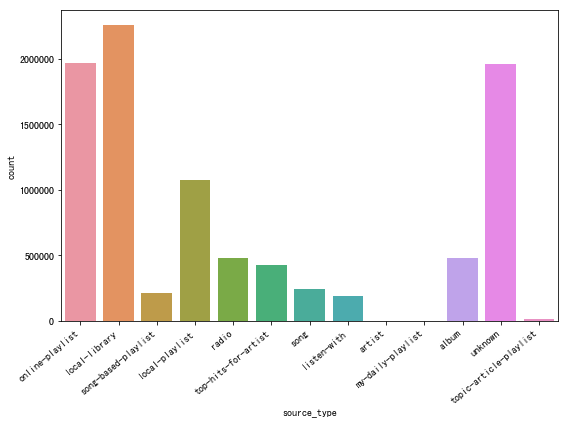

In [40]:
#source_type
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "source_type", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# . means the absolutely dir at that time
plt.savefig('./KKBOX/source_type.png')
plt.show()

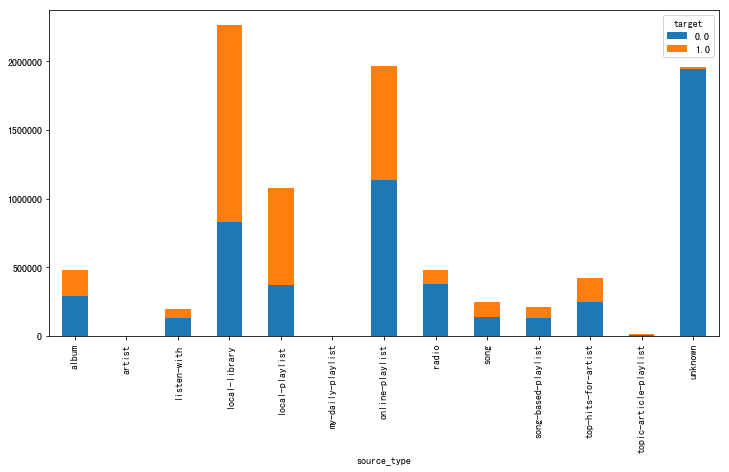

In [41]:
#cross table visualization
ct = pd.crosstab(df.source_type, df.target)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.savefig('./KKBOX/source_target.png')
plt.show()

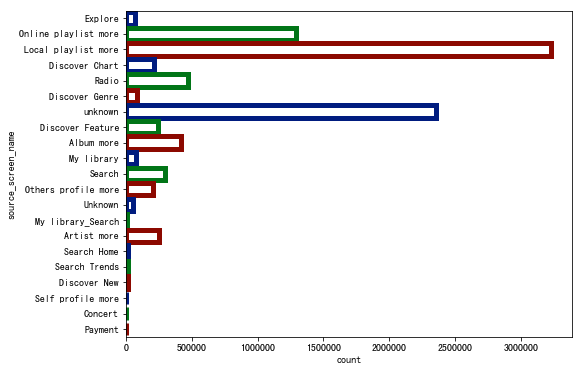

In [42]:
#source_screen_name
plt.figure(figsize = (8, 6))
ax = sns.countplot(y=df['source_screen_name'], data=df, facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))
plt.savefig('./KKBOX/source_screen_name.png')
plt.show()

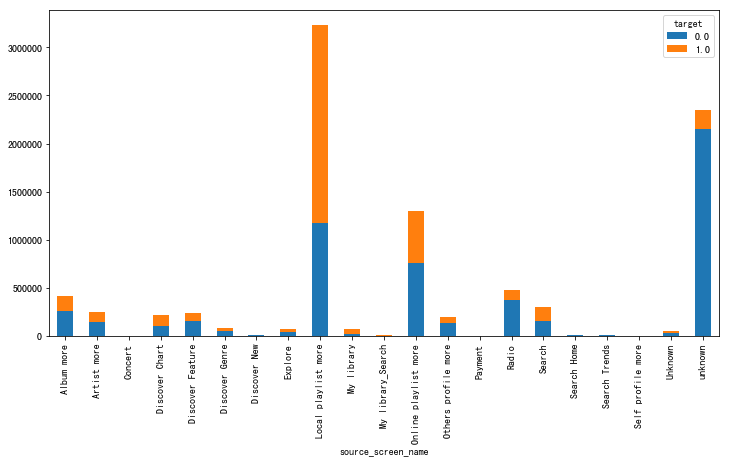

In [43]:
ct = pd.crosstab(df.source_screen_name, df.target)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.savefig('./KKBOX/source_screen_name_target.png')
plt.show()

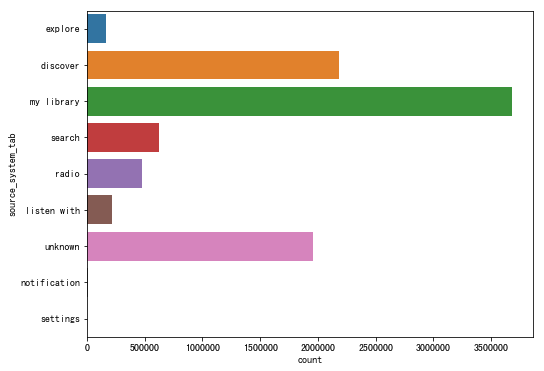

In [44]:
#source_system_tab
plt.figure(figsize = (8, 6))
ax = sns.countplot(y = "source_system_tab", data = df)
plt.savefig('./KKBOX/source_system_tab.png')
plt.show()

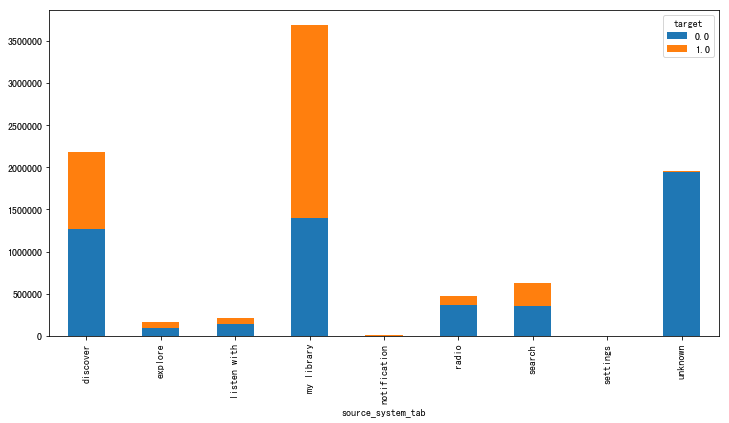

In [45]:
#cross table 
ct = pd.crosstab(df.source_system_tab, df.target)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.savefig('./KKBOX/source_system_tab_target.png')
plt.show()

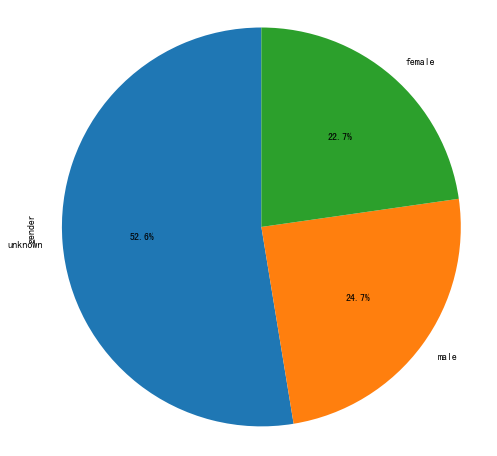

In [47]:
#gender
plt.figure(figsize = (8, 8))
pp = pd.value_counts(df.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.savefig('./KKBOX/gender.png')
plt.show()

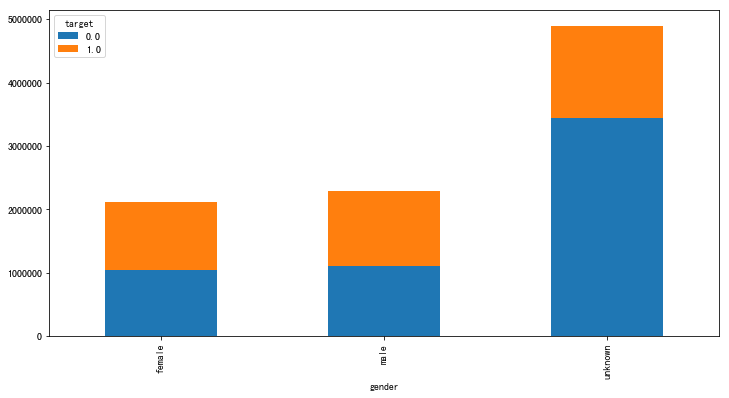

In [48]:
ct = pd.crosstab(df.gender, df.target)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.savefig('./KKBOX/gender_target.png')
plt.show()

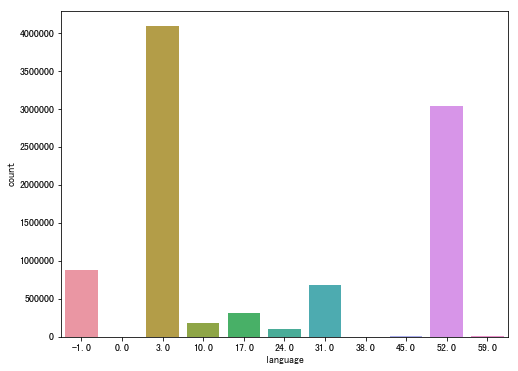

In [49]:
#language
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "language", data = df)
plt.savefig('./KKBOX/language.png')
plt.show()

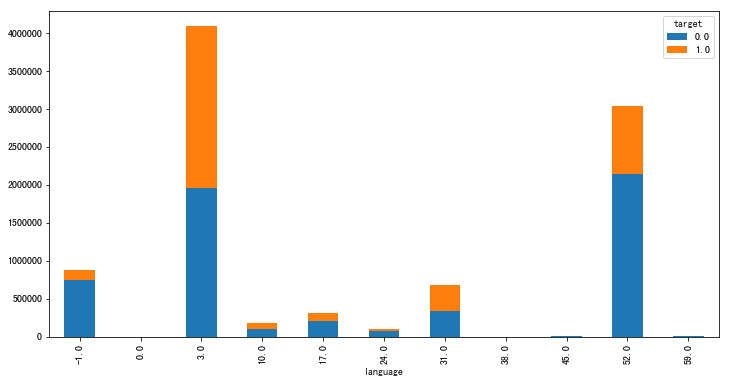

In [51]:
ct = pd.crosstab(df.language, df.target)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.savefig('./KKBOX/language_target.png')
plt.show()

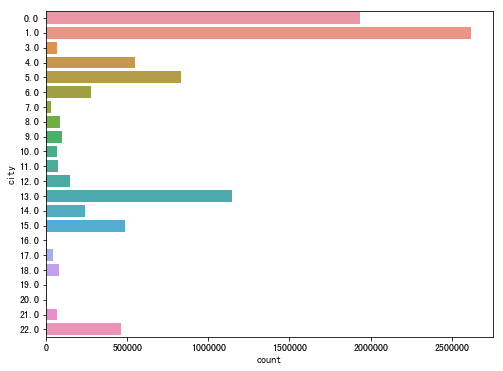

In [52]:
#city
plt.figure(figsize = (8, 6))
ax = sns.countplot(y = "city", data = df)
plt.savefig('./KKBOX/city.png')
plt.show()

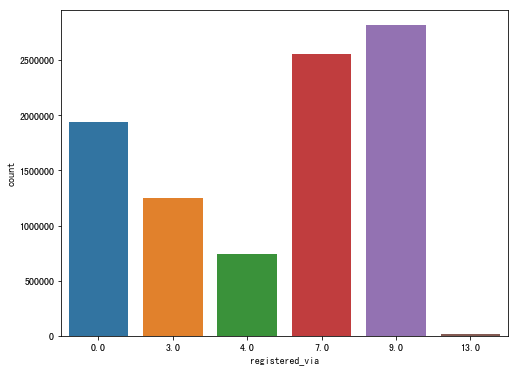

In [53]:
#register_via
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "registered_via", data = df)
plt.show()

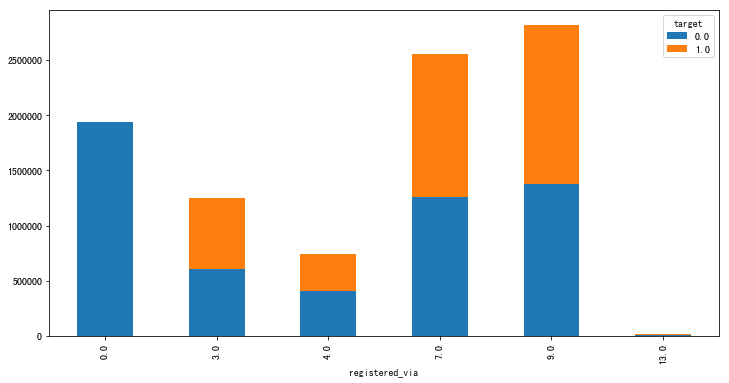

In [54]:
ct = pd.crosstab(df.registered_via, df.target)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.savefig('./KKBOX/registered_via_target.png')
plt.show()

In [56]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language'],
      dtype='object')

df

In [72]:
from collections import Counter

In [78]:
Counter(df.genre_ids)

Counter({'359': 145148,
         '1011': 65024,
         '1259': 270390,
         '465': 4149291,
         '1609': 457887,
         '139': 94900,
         '691': 32444,
         '2022': 300840,
         '1616|2058': 10123,
         nan: 205338,
         '1609|2058': 1063,
         '2072': 5471,
         '1616': 24735,
         '1616|2072': 2407,
         '139|125|109': 42525,
         '444': 252330,
         '2022|1955': 309,
         '352|1995': 6884,
         '921': 403744,
         '465|1259': 35650,
         '1040': 1252,
         '465|139': 4657,
         '2093': 2135,
         '1616|1609': 42577,
         '465|1011': 6741,
         '465|2022': 13181,
         '423': 14849,
         '921|465': 30489,
         '458': 1267639,
         '451': 73286,
         '430': 10989,
         '437': 70103,
         '2122': 197378,
         '465|1609': 910,
         '444|1259': 32721,
         '465|458': 16958,
         '1259|139': 134,
         '1609|1259': 560,
         '139|1259': 490,
      

In [20]:
df.expiration_date.describe()

count                 7377418
unique                   1395
top       2017-09-30 00:00:00
freq                   759461
first     1970-01-01 00:00:00
last      2020-10-17 00:00:00
Name: expiration_date, dtype: object

Convert date columns from type integer to datetime.
Extract year, month and day information from date columns.

In [8]:
from datetime import datetime

In [12]:
#transform float to int
def datechange(times):
    try:
        date= datetime.strptime(str(int(times)),'%Y%m%d')
    except ValueError:
        date = np.nan
    return date

In [13]:
Date=df['registration_init_time'].apply(datechange)
exp_date=df['expiration_date'].apply(datechange)

In [14]:
df['registration_init_time'] = Date
df['expiration_date'] = exp_date

In [15]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,1.0,0.0,NaN,7.0,2012-01-02,2017-10-05,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0.0,15.0,18.0,male,4.0,2015-12-20,2017-09-30,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,1.0,0.0,NaN,7.0,2012-08-04,2017-10-04,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,5.0,21.0,female,9.0,2011-08-08,2017-09-17,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0.0,6.0,33.0,female,9.0,2007-03-23,2017-09-15,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0


In [ ]:
Counter(df.registration_init_time)

# Times Series Analytic

In [42]:
df.expiration_date.describe()

count                 7377418
unique                   1395
top       2017-09-30 00:00:00
freq                   759461
first     1970-01-01 00:00:00
last      2020-10-17 00:00:00
Name: expiration_date, dtype: object

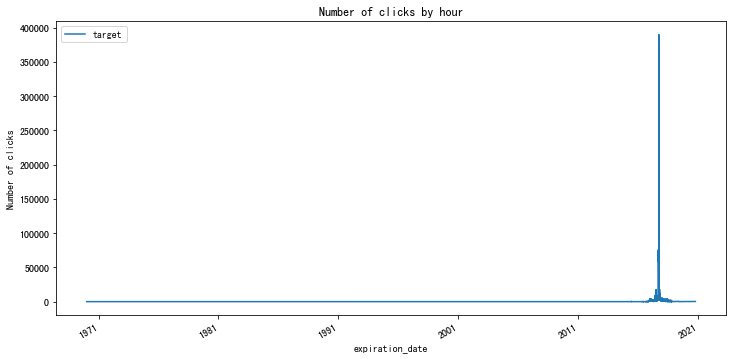

In [17]:
#target + registration_init_time
df.groupby('expiration_date').agg({'target':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

In [73]:
Counter(df.msno)

Counter({'FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=': 5511,
         'pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=': 748,
         'xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=': 521,
         's0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=': 542,
         'Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=': 1545,
         'YqtKhiDOFJ/gdd2V4AFdnVwGMMaA0yUEbb8w7xuoP7I=': 1171,
         'jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=': 999,
         'ruQx4VOdTq74CDI1viGqQAIASWrU4soi74t1E3N6KO4=': 301,
         '7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=': 3133,
         'z2IYoGWjJJPv4ySp+1lCIfU1APu2YRHsjY2sy2ehq0k=': 1049,
         'oKMHFr1nozVUOW4TP9bcbtVhgCt5gh+22fJ1mUXx9eM=': 256,
         'e5Ezre9HPuPos+CXQXtmo32E/hHIZTMmo6jG3yRf6UA=': 1153,
         'tlFGRF/TtrSwJA9XPHL4cajWghZCbAbhzif/6wJiN6Q=': 2227,
         'Gytn0lz9OGR2vGl/tSXA3rDUcNnU4TnxFcWb+iv2pXc=': 1153,
         'pRHIP4XdwWx7YpREsLN4sD0gb2BUEbhKytDXlwUAO+k=': 1622,
         'vf72WjMnAjr9ELP36xOjbCXhXQTk2qCQ1MW56xKT12s=': 1299

In [75]:
df[(df.song_id=='+h+uIXLQyXHuCdwAY5oT3T302vt0IdQJtux0APXhriw=')&(df.msno=='FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=')]

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
6801,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,+h+uIXLQyXHuCdwAY5oT3T302vt0IdQJtux0APXhriw=,explore,Explore,online-playlist,1.0,1.0,0.0,NaN,7.0,2012-01-02,2017-10-05,187895.0,465,Shawn Mendes,Shawn Mendes| Teddy Geiger| Scott Harris,NaN,52.0


In [74]:
Counter(df.song_id)

Counter({'BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=': 215,
         '3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=': 412,
         '3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=': 1108,
         'bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=': 287,
         'XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=': 4779,
         '+h+uIXLQyXHuCdwAY5oT3T302vt0IdQJtux0APXhriw=': 5314,
         '+LztcJcPEEwsikk6+K5udm06XJQMzR4+lzavKLUyE0k=': 7697,
         'rdNg0FiLBStCei8h1/h2kwv8IS97ZgONQkb/kXGAvqM=': 323,
         'WRuHbl8CJbAuzUb4f/88Ly6IXif+IVVWolkp33Nm8wI=': 3865,
         'NWrFxxzjzsSolyGnnLWlkRrMUIzbxhKesaJHNOp8e80=': 129,
         'eY3mod6Vs39GLjL86RwYG+6jDkjYUB5AGjbPEuqJmQM=': 1363,
         'nt4dYk1vQyKPzun5YtaRpLB9xWOWIU3QKiZV3aTOJYs=': 378,
         'BnjOmObP+8X8Yxk3tPHy1309L++jhPWBFD8QXCYJsT4=': 873,
         'EUEMfptvZVeqhSQI6PzZeE/dX34a4fE1AnbJNyuDPjk=': 191,
         'yPMxRWxhG2gZj2BV1mzTW/faIoigIh1F9gWtXBslIOg=': 296,
         'e8qPmXjLP6RwXiYsrQB2Z3gRSS34LNCoYFR7iYznvOs=': 681,
  

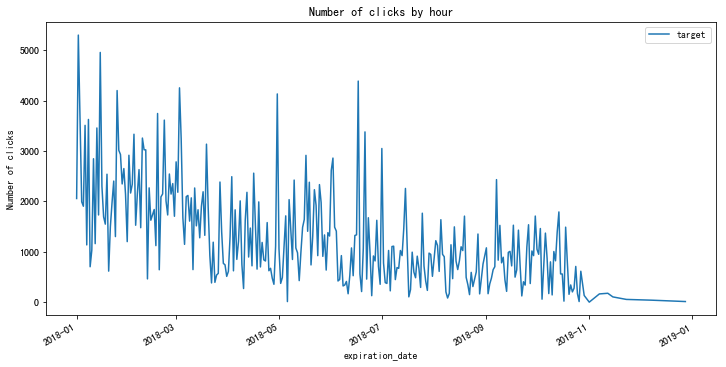

In [37]:
#forcus 但這個數據好像沒有意義,只是關於data的抓取時間,所以才會大量的聚集在這個時間
df[(df.expiration_date>='2018-01-01')& (df.expiration_date<='2018-12-31')].groupby('expiration_date').agg({'target':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');
plt.savefig('./KKBOX/expiration_date_click.png')

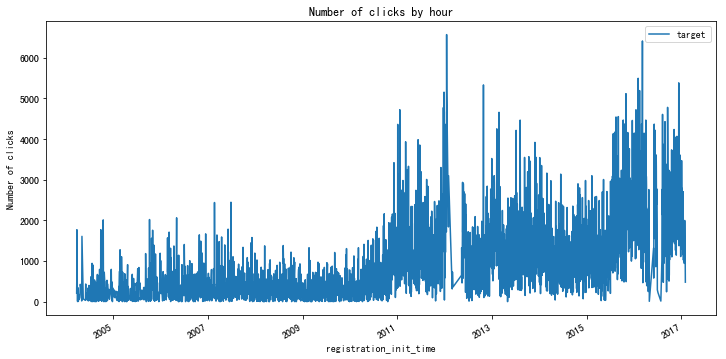

In [44]:
df.groupby(['registration_init_time']).agg({'target':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');
plt.savefig('./KKBOX/registration_init_time.png')

In [ ]:
df.groupby('registration_init_time').agg({'target':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');
#plt.savefig('./KKBOX/registration_init_time.png')

corr matrix

Label Encoding is need

In [191]:
from sklearn import preprocessing

In [156]:
df.columns[2:]

Index(['source_system_tab', 'source_screen_name', 'source_type', 'target',
       'city', 'bd', 'gender', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language'],
      dtype='object')

In [199]:
cols=['source_system_tab','source_screen_name','source_type','target','gender','song_length','genre_ids','language']

In [201]:
df_test = df[cols]

In [205]:
df_test.head()

,source_system_tab,source_screen_name,source_type,target,gender,song_length,genre_ids,language
0,1,7,6,1.0,2,206471.0,535,52.0
1,0,11,6,0.0,1,206471.0,535,52.0
2,3,8,3,1.0,2,206471.0,535,52.0
3,3,8,3,1.0,0,206471.0,535,52.0
4,3,8,3,0.0,0,206471.0,535,52.0


In [204]:
#transform 'object' to 'str' 
for col in cols:
    if df_test[col].dtype == 'object':
        df_test[col] = df_test[col].apply(str)
        

        le = preprocessing.LabelEncoder()
        label_vals = list(df_test[col].unique())
        
        le.fit(label_vals)
        df_test[col] = le.transform(df_test[col])
        

C:\Users\a0970\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\a0970\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


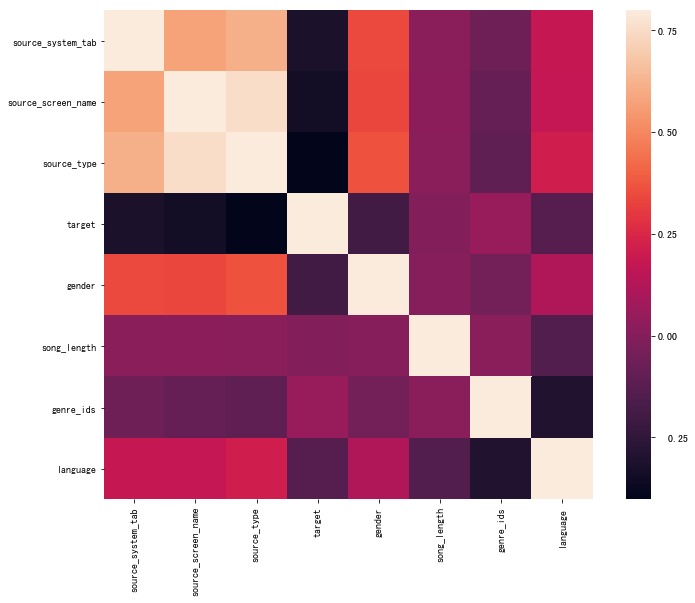

In [206]:
cr = df_test.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cr, vmax=.8, square=True);
#save figure
#plt.savefig('./KKBOX/heatmap_test.png')

It seems that plot cov can't show many information to us .Let's try another method

In [207]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,1.0,0.0,unknown,7.0,2012-01-02,2017-10-05,206471.0,359,Bastille,Dan Smith| Mark Crew,unknown,52.0
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0.0,15.0,18.0,male,4.0,2015-12-20,2017-09-30,206471.0,359,Bastille,Dan Smith| Mark Crew,unknown,52.0
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,1.0,0.0,unknown,7.0,2012-08-04,2017-10-04,206471.0,359,Bastille,Dan Smith| Mark Crew,unknown,52.0
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1.0,5.0,21.0,female,9.0,2011-08-08,2017-09-17,206471.0,359,Bastille,Dan Smith| Mark Crew,unknown,52.0
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0.0,6.0,33.0,female,9.0,2007-03-23,2017-09-15,206471.0,359,Bastille,Dan Smith| Mark Crew,unknown,52.0


In [209]:
len(list(df['msno'].unique()))

30756

In [210]:
len(list(df['song_id'].unique()))

2296372

We can find that there are about 1000 w data , but it;s just 3W ID and 200 W 's ID  so we can try to calculate some new var  

In [227]:
p1=df[df['song_id']=='BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=']

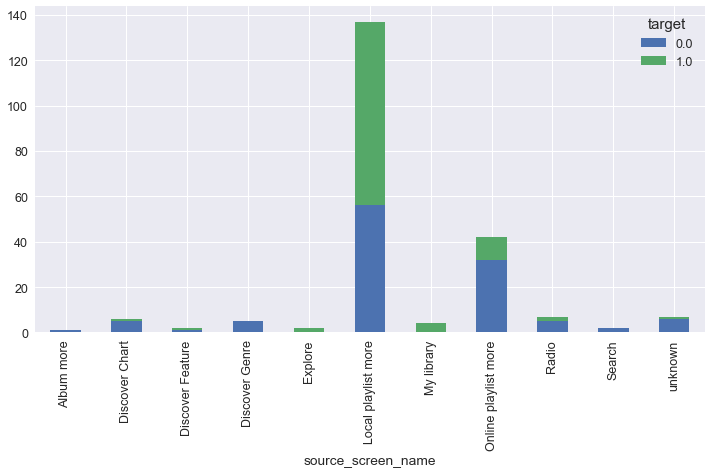

In [228]:
ct = pd.crosstab(p1.source_screen_name, p1.target)
ct.plot.bar(figsize = (12, 6), stacked=True)
#plt.savefig('./KKBOX/registered_via_target.png')
plt.show()

In [220]:
tt = pd.get_dummies(df[['source_system_tab','source_screen_name','source_type','target']])

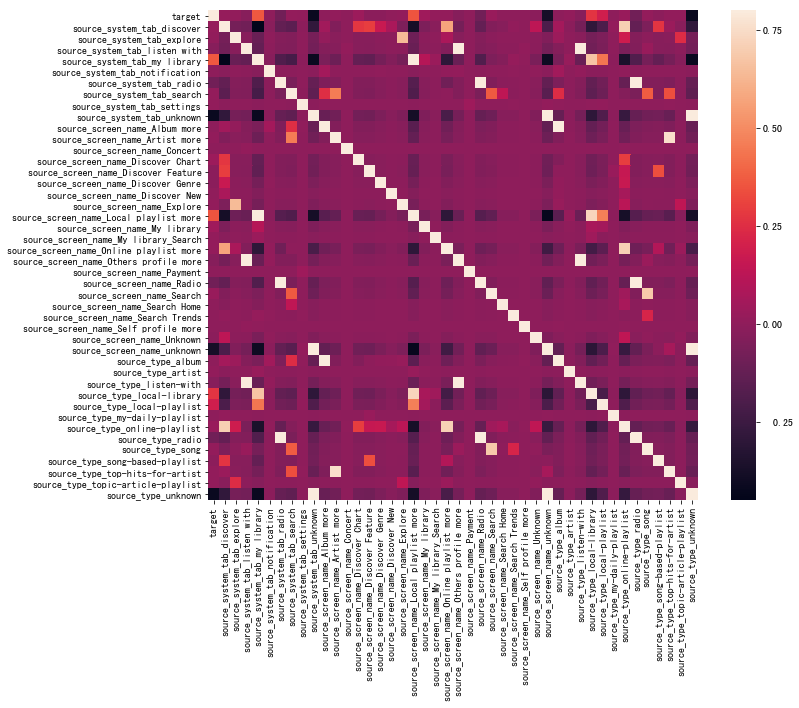

In [223]:
cr = tt.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cr, vmax=.8, square=True);
#save figure
plt.savefig('./KKBOX/heatmap_source_tab.png')

choose top ten 

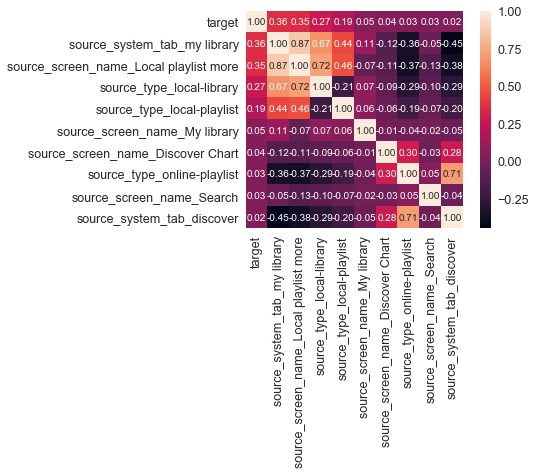

In [226]:
k = 10
cols = cr.nlargest(k, 'target')['target'].index
cm = np.corrcoef(tt[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('./KKBOX/heatmap_top10.png')
plt.show()

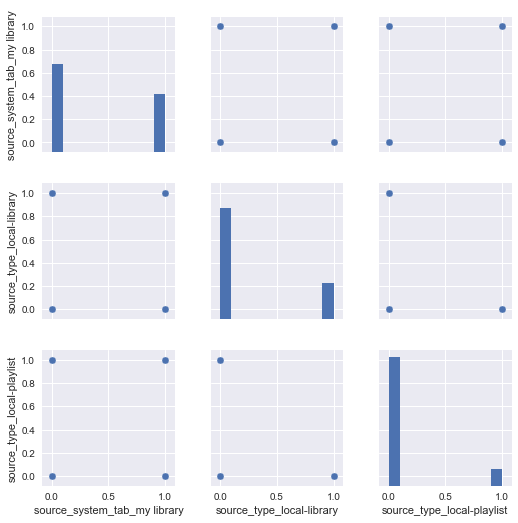

In [230]:
#scatterplot
sns.set()
cols = ['source_system_tab_my library','source_type_local-library','source_type_local-playlist']
sns.pairplot(tt[cols], size = 2.5)
plt.show();